In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import tweepy
import nltk 
from nltk.stem import *
from textblob import TextBlob

In [5]:
file =('twitter_dataset.csv')
df = pd.read_csv('twitter_dataset.csv', encoding = 'latin', header=None)

In [6]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
df = df.rename(columns={0: 'target', 1: 'id', 2: 'date', 3: 'query', 4: 'username', 5: 'content'})

In [8]:
print(" \nTotal null values in this DataFrame :",df.isnull().sum().sum())
#df = df.dropna(how='any',axis=0)
df.info()

 
Total null values in this DataFrame : 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   target    1600000 non-null  int64 
 1   id        1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   query     1600000 non-null  object
 4   username  1600000 non-null  object
 5   content   1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
#df=df.drop(['id','date','query','username'],axis=1)

In [7]:
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   target    1600000 non-null  int64 
 1   id        1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   query     1600000 non-null  object
 4   username  1600000 non-null  object
 5   content   1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [8]:
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup 
import re
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.content[:100]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

['awww that s a bummer you shoulda got david carr of third day to do it d',
 'is upset that he can t update his facebook by texting it and might cry as a result school today also blah',
 'i dived many times for the ball managed to save the rest go out of bounds',
 'my whole body feels itchy and like its on fire',
 'no it s not behaving at all i m mad why am i here because i can t see you all over there',
 'not the whole crew',
 'need a hug',
 'hey long time no see yes rains a bit only a bit lol i m fine thanks how s you',
 'k nope they didn t have it',
 'que me muera',
 'spring break in plain city it s snowing',
 'i just re pierced my ears',
 'i couldn t bear to watch it and i thought the ua loss was embarrassing',
 'it it counts idk why i did either you never talk to me anymore',
 'i would ve been the first but i didn t have a gun not really though zac snyder s just a doucheclown',
 'i wish i got to watch it with you i miss you and how was the premiere',
 'hollis death scene will hurt

In [126]:
nums = [0,400001,800001,1200001,1600000]
print("Cleaning and parsing the tweets...\n")
#clean_tweet_texts = []
for i in range(nums[3],nums[4]):
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, nums[4] ))                                                                    
    clean_tweet_texts.append(tweet_cleaner(df['content'][i]))

Cleaning and parsing the tweets...



NameError: name 'clean_tweet_texts' is not defined

In [9]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.target
clean_df.head()

NameError: name 'clean_tweet_texts' is not defined

In [19]:
#clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.info()
data=my_df
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599997 entries, 0 to 1599996
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1596750 non-null  object
 1   target  1599997 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 36.6+ MB


,text,target
0,awww that s a bummer you shoulda got david carr of third day to do it d,0
1,is upset that he can t update his facebook by texting it and might cry as a result school today also blah,0
2,i dived many times for the ball managed to save the rest go out of bounds,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i here because i can t see you all over there,0


In [32]:
data.target.unique()
#unique values are 0 and 4 in category column which can be used for classifying positive and negative tweets

array([0, 4], dtype=int64)

In [33]:
pd.set_option('display.max_colwidth', -1)
data[data['target']==0]['text'].head()
#class 0 refers to negative tweets

<ipython-input-33-289ff6b83c67>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


0    awww that s a bummer you shoulda got david carr of third day to do it d                                  
1    is upset that he can t update his facebook by texting it and might cry as a result school today also blah
2    i dived many times for the ball managed to save the rest go out of bounds                                
3    my whole body feels itchy and like its on fire                                                           
4    no it s not behaving at all i m mad why am i here because i can t see you all over there                 
Name: text, dtype: object

In [22]:
data[data['target']==4]['text'].head()
#class 4 refers to positive tweets

KeyError: 'target'

In [35]:
data['target'] = data['target'].replace([0, 4],['Negative','Positive'])
#Changing labels from 0 and 4 for more informative labels for further analysis

In [36]:
data.head()

,text,target
0,awww that s a bummer you shoulda got david carr of third day to do it d,Negative
1,is upset that he can t update his facebook by texting it and might cry as a result school today also blah,Negative
2,i dived many times for the ball managed to save the rest go out of bounds,Negative
3,my whole body feels itchy and like its on fire,Negative
4,no it s not behaving at all i m mad why am i here because i can t see you all over there,Negative


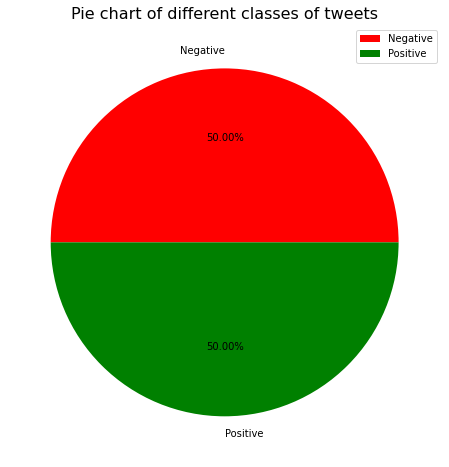

In [40]:
fig = plt.figure(figsize=(8,8))
targets = data.groupby('target').size()
targets.plot(kind='pie', subplots=True, figsize=(10, 8), autopct = "%.2f%%", colors=['red','green'])
plt.title("Pie chart of different classes of tweets",fontsize=16)
plt.ylabel("")
plt.legend()
plt.show()
#plotting a pie chart for descriptive analysis

In [93]:
data = data.dropna(axis = 0, how ='any')

In [95]:
print(len(data.text))
score=[]

1596750


In [105]:
'''
count=0
tweets_list=data.text[0:400000]
for i in tweets_list:
    print(count)
    count+=1
    analysis = TextBlob(i)
    #print(analysis.sentiment.polarity)
'''
nums = [0,400000,800000,1200000,1599998]
#sentiment_score = []
tweets_list=data.text[nums[3]:nums[4]]
for i in tweets_list:
    analysis = TextBlob(i)
    score.append(analysis.sentiment.polarity)
print("Done")

'''
if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
'''

Done


"\nif analysis.sentiment.polarity > 0:\n            return 'positive'\n        elif analysis.sentiment.polarity == 0:\n            return 'neutral'\n        else:\n            return 'negative'\n"

In [107]:
detected_sentiment=[]

In [116]:
scores_list=score[nums[3]:nums[4]]
for i in scores_list:
    if i > 0:
        detected_sentiment.append('positive')
    elif i == 0:
        detected_sentiment.append('neutral')
    else:
        detected_sentiment.append('negative')
print("done")
print(len(detected_sentiment))

done
1596750


In [118]:
print(len(data.text))
print(len(score))
print(len(data))
print(len(detected_sentiment))

1596750
1596750
1596750
1596750


In [2]:
'''
new_df = pd.DataFrame(data.text,columns=['text'])
new_df['actual'] = data.target
new_df['sentiment_score'] = score
new_df['detected'] = detected_sentiment
new_df.to_csv('classified_tweets.csv',encoding='utf-8')
'''
csv = 'classified_tweets.csv'
my_df = pd.read_csv(csv,index_col=0)
data=my_df
data.info()

c:\users\manth\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596750 entries, 0 to 1599996
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   text             1596750 non-null  object 
 1   actual           1596750 non-null  object 
 2   sentiment_score  1596750 non-null  float64
 3   detected         1596750 non-null  object 
dtypes: float64(1), object(3)
memory usage: 60.9+ MB


In [129]:
data.head()
data['detected'].value_counts()

positive    702838
neutral     557565
negative    336347
Name: detected, dtype: int64

In [130]:
data['sentiment_score'].describe()

count    1.596750e+06
mean     9.541325e-02
std      3.302594e-01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.857143e-01
max      1.000000e+00
Name: sentiment_score, dtype: float64

In [133]:
positive_tweets_list=data[data['detected']=='positive']
neutral_tweets_list=data[data['detected']=='neutral']
negative_tweets_list=data[data['detected']=='negative']

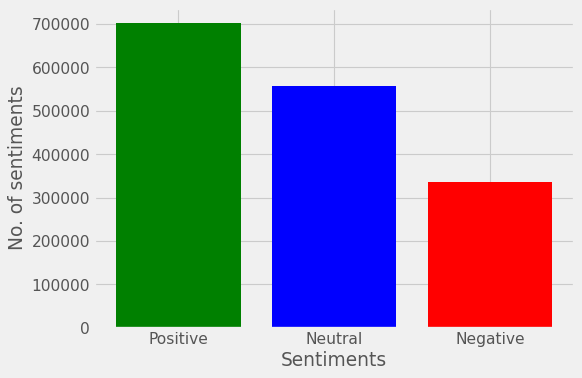

In [148]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(6, 4), dpi=80)
ax = fig.add_axes([0,0,1,1])
sentiments = ['Positive','Neutral','Negative']
no_of_tweets = [len(positive_tweets_list),len(neutral_tweets_list),len(negative_tweets_list)]
ax.bar(sentiments,no_of_tweets,color=['green', 'blue', 'red'])
plt.xlabel('Sentiments')
plt.ylabel('No. of sentiments')
plt.show()

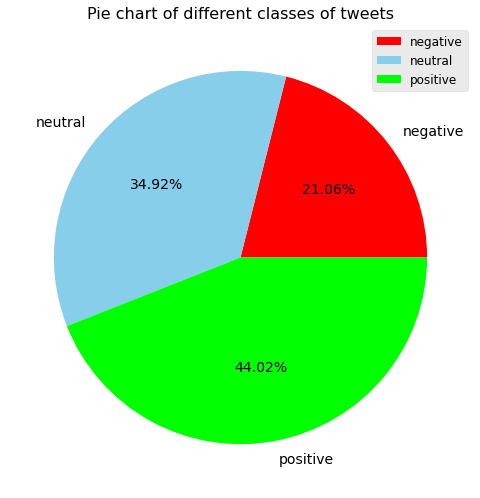

In [170]:
fig = plt.figure(figsize=(8,8))
targets = data.groupby('detected').size()
targets.plot(kind='pie', subplots=True, figsize=(10, 8), autopct = "%.2f%%", colors=['red','skyblue','lime'],textprops={'fontsize': 14})
plt.title("Pie chart of different classes of tweets",fontsize=16)
plt.ylabel("")
plt.legend()
plt.show()

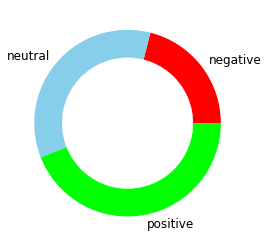

In [174]:
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(targets, labels=["negative","neutral","positive"], colors=['red','skyblue','lime'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [217]:
data.sentiment_score.value_counts()

 0.000000    557565
 0.500000    74505 
 0.200000    60509 
-0.500000    39326 
 0.800000    38788 
             ...   
-0.425714    1     
-0.098958    1     
-0.027679    1     
 0.192460    1     
 0.137649    1     
Name: sentiment_score, Length: 13503, dtype: int64

In [218]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(data['text'])

In [242]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['sentiment_score'], test_size=0.25, random_state=5)

In [243]:
#https://github.com/sharmaroshan/Twitter-Sentiment-Analysis/blob/master/twitter_sentiment.py

In [244]:
data['sentiment_score'] = data['sentiment_score'].astype(int)
display(data.dtypes)

text               object
actual             object
sentiment_score    int32 
detected           object
dtype: object

In [245]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1197562,)
(399188,)
(1197562,)
(399188,)


In [246]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB()

In [247]:
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)

In [248]:
print(str('{:04.2f}'.format(accuracy_score*100))+'%')

98.49%


In [257]:
'''
Split your data into training and evaluation sets.
Select a model architecture.
Use training data to train your model.
Use test data to evaluate the performance of your model.
Use your trained model on new data to generate predictions, which in this case will be a number between -1.0 and 1.0
'''

'\nSplit your data into training and evaluation sets.\nSelect a model architecture.\nUse training data to train your model.\nUse test data to evaluate the performance of your model.\nUse your trained model on new data to generate predictions, which in this case will be a number between -1.0 and 1.0\n'

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,max_df = 0.8,sublinear_tf = True,use_idf = True)
train_vectors = vectorizer.fit_transform(data['text'][:1000])
test_vectors = vectorizer.transform(data['text'][:1000])

In [15]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, data['detected'][:1000])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(data['detected'][:1000], prediction_linear, output_dict=True)
print('positive: ', report['positive'])
print('negative: ', report['negative'])
print('Accuracy: ', report['accuracy']*100,"%")

Training time: 0.123994s; Prediction time: 0.078996s
positive:  {'precision': 0.9245283018867925, 'recall': 0.8112582781456954, 'f1-score': 0.8641975308641975, 'support': 302}
negative:  {'precision': 0.8676923076923077, 'recall': 0.8057142857142857, 'f1-score': 0.8355555555555556, 'support': 350}
Accuracy:  85.3 %


In [21]:
for i in data['text'][200:300]:
    review_vector = vectorizer.transform([i]) # vectorizing
    print(i,classifier_linear.predict(review_vector))
    print()

job interview in cardiff today wish me luck got about hours sleep ['neutral']

your show is whack way worse than whack it s wiggety whack ['negative']

i really don t think people choose to be that way but i think he chose not to accept my family s help he might be dead by now ['negative']

you re going to kill me but i ve not seen ds i ve been waiting till i can do it in one solid week sitting ['neutral']

i think ur right hahaha hrs now ['positive']

i hate to see the spartans so sad ['negative']

my mind and body are severely protesting this getting up thing had nightmares to boot ['negative']

i m goin to follow u since u didn t lol go angels ['positive']

i think i want to read some books but the library doesn t have them ['neutral']

my nap was interrupted so many times today going out for japanese with the rents again ['positive']

kind of longs for the bus that shows up at the end of ghost world right now ugh ['positive']

but this is canada canada is weird we re supposed to ge